# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [17]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [18]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [42]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


觀察男女性在變數AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY當中是否存在差異:

In [91]:
# 在此選取男女性的AMT_INCOME_TOTAL
income=app_train['AMT_INCOME_TOTAL']
income_F=app_train.loc[app_train['CODE_GENDER']=="F"]['AMT_INCOME_TOTAL']
income_M=app_train.loc[app_train['CODE_GENDER']=="M"]['AMT_INCOME_TOTAL']
credit_F=app_train.loc[app_train['CODE_GENDER']=="F"]['AMT_CREDIT']
credit_M=app_train.loc[app_train['CODE_GENDER']=="M"]['AMT_CREDIT']
annuity_F=app_train.loc[app_train['CODE_GENDER']=="F"]['AMT_ANNUITY']
annuity_M=app_train.loc[app_train['CODE_GENDER']=="M"]['AMT_ANNUITY']

In [92]:
# 在此可以計算平均數、標準差 
print("性別為女性的AMT_INCOME_TOTAL平均為{}".format(round(income_F.mean())))
print("性別為男性的AMT_INCOME_TOTAL平均為{}".format(round(income_M.mean())))
print("性別為女性的AMT_INCOME_TOTAL標準差為{}".format(round(income_F.std())))
print("性別為男性的AMT_INCOME_TOTAL標準差為{}".format(round(income_M.std())))

性別為女性的AMT_INCOME_TOTAL平均為156032
性別為男性的AMT_INCOME_TOTAL平均為193396
性別為女性的AMT_INCOME_TOTAL標準差為274826
性別為男性的AMT_INCOME_TOTAL標準差為134597


In [93]:
# 更多統計量可利用describe取得
print("Female:\n",round(income_F.describe()),"\n")
print("Male:\n",round(income_M.describe()))

Female:
 count       202448.0
mean        156032.0
std         274826.0
min          25650.0
25%          99000.0
50%         135000.0
75%         180000.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64 

Male:
 count      105059.0
mean       193396.0
std        134597.0
min         27000.0
25%        135000.0
50%        180000.0
75%        225000.0
max      18000090.0
Name: AMT_INCOME_TOTAL, dtype: float64


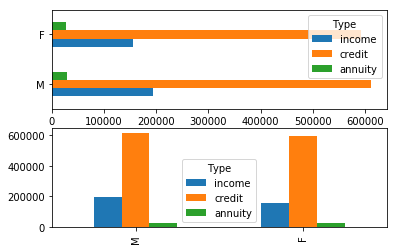

In [115]:
tmp=[[round(income_M.mean()),round(credit_M.mean()),round(annuity_M.mean())],
[round(income_F.mean()),round(credit_F.mean()),round(annuity_F.mean())]]
df = pd.DataFrame(tmp, index=['M','F'], columns=pd.Index(['income', 'credit', 'annuity'], name="Type"))
fig, axes=plt.subplots(2,1)
df.plot(kind='barh',ax=axes[0])
df.plot(kind='bar',ax=axes[1])

上圖分別為直方圖縱向與橫向的畫法，其中表示income(藍色)、credit(橘色)及annuity(綠色)在不同性別之下的平均數，由圖可知性別為男性在income與credit的平均數中高於女性，而在annuity兩者在途中並沒有明顯的差異。